# P2P Default Binary Classification | Supervised Learning

Hypothesis:

    H0 - Null hypothesis, when the model cannot beat the null accuracy score for "Fully Paid" & "Charged Off" loans
    H1 - Reject the Null hypothesis, when accuracy, precision and recall scores can beat the null accuracy score.

True Positives (TP): Number of correct positive predictions | correctly predicted loan will Charged Off (1)
True Negatives (TN): Number of correct negative predictions | correctly predicted loan will be Fully Paid (0)
False Positives (FP): Number incorrect positive predictions | incorrectly predicted loan will be Charged Off
False Negatives (FN): Number of incorrect negative predictions | incorrectly predicted loan will be Fully Paid

Goals:

I'm planning to select a supervised learning model to see what features attribute to a loan default(binary classification). (TP+TN)/Total Population is the Accuracy (ACC) score bench mark in comparison of each model. 
I have Lending Club's 2015 dataset with 145 loan characteristics, and 400k+ records to begin with.
The dataset is relatively large, and data is very sparse - possibly very redundant features. 

Feature engineering will be a challenge, and we want to know whether or not the user will default or not based on their application information, and not based on Lending Club's collected data once the loan is issued. This is also the reason for an older dataset where we already know if they have successfully paid off their loan or have defaulted under the "loan_status" field. 
I used to work for Lending Club's Investor Group, and would be interested in demystifying the underwriting model, and which types have highest tendencies to default. 

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")

In [237]:
df.emp_title.nunique()
# we will attempt to use NLP for model improvements when possible. There's reason to believe that there's a 
# direct impact on the ability to pay back a loan based on a borrower's job title. 

120811

In [238]:
df.emp_title.head()

0                     Master mechanic
1    Emergency Department technician 
2                          Supervisor
3                             Teacher
4                Program Coordinator 
Name: emp_title, dtype: object

# Exploratory Data Analysis

In [3]:
df.application_type.value_counts()
# do not include Joint App

Individual    420584
Joint App        511
Name: application_type, dtype: int64

In [8]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,210994.000000,210994.000000,210994.000000,210994.000000,2.109940e+05,0.0,210992.000000,210994.000000,210994.000000,109046.000000,...,153.0,153.000000,153.0,153.000000,16.000000,153.000000,153.000000,4583.000000,4583.000000,4583.000000
mean,14949.374508,14949.374508,14943.359854,443.917652,7.662230e+04,NaN,18.876317,0.335246,0.637919,34.801790,...,3.0,126.561961,3.0,18.294118,316.113750,9849.725556,179.584314,5731.476498,49.000343,12.094043
std,8562.173794,8562.173794,8558.678600,250.949787,7.178636e+04,NaN,8.704507,0.921001,0.918971,22.126952,...,0.0,105.504755,0.0,8.282736,209.439967,6641.912773,164.910743,3864.310434,7.458421,8.380446
min,1000.000000,1000.000000,900.000000,14.010000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,...,3.0,2.690000,3.0,0.000000,57.420000,239.790000,0.440000,198.000000,20.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,261.880000,4.667350e+04,NaN,12.350000,0.000000,0.000000,16.000000,...,3.0,40.490000,3.0,13.000000,154.522500,4639.090000,44.080000,2740.850000,45.000000,4.000000
50%,13200.000000,13200.000000,13200.000000,385.360000,6.500000e+04,NaN,18.320000,0.000000,0.000000,32.000000,...,3.0,94.200000,3.0,21.000000,250.770000,8343.420000,128.990000,4897.000000,47.040000,12.000000
75%,20000.000000,20000.000000,20000.000000,586.035000,9.100000e+04,NaN,25.012500,0.000000,1.000000,52.000000,...,3.0,184.810000,3.0,25.000000,453.667500,13905.000000,274.370000,7751.310000,50.010000,18.000000
max,35000.000000,35000.000000,35000.000000,1445.460000,8.900060e+06,NaN,380.530000,39.000000,6.000000,176.000000,...,3.0,569.750000,3.0,29.000000,699.480000,28078.200000,798.390000,30000.000000,166.670000,65.000000


In [4]:
df.loan_status.value_counts()

Current               196354
Fully Paid            155420
Charged Off            55574
Late (31-120 days)      7647
In Grace Period         4692
Late (16-30 days)       1387
Default                   21
Name: loan_status, dtype: int64

In [5]:
# We will only work with loans that have been "Fully Paid", and those that "Charged Off". 
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]

In [6]:
df.shape
# cuts the dataset responses in half.

(210994, 143)

In [7]:
#"loan_status" will be the target variable. ~74% null accuracy is what we need to beat with our model
df.loan_status.value_counts(normalize=True)*100

Fully Paid     73.660862
Charged Off    26.339138
Name: loan_status, dtype: float64

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

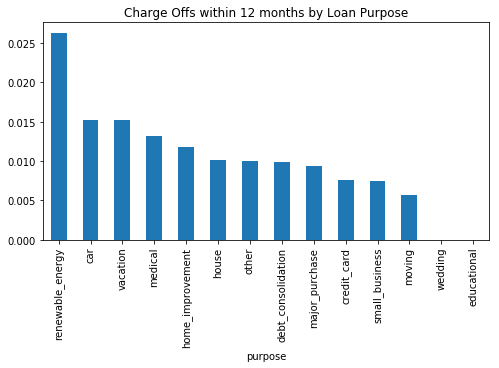

In [218]:
df.groupby("purpose")["chargeoff_within_12_mths"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Charge Offs within 12 months by Loan Purpose")
plt.show();
#we can see which types of borrowers are most irresponsible. 

['debt_consolidation' 'car' 'small_business' 'house' 'credit_card'
 'home_improvement' 'major_purchase' 'vacation' 'other' 'moving' 'medical'
 'renewable_energy' 'wedding' 'educational']


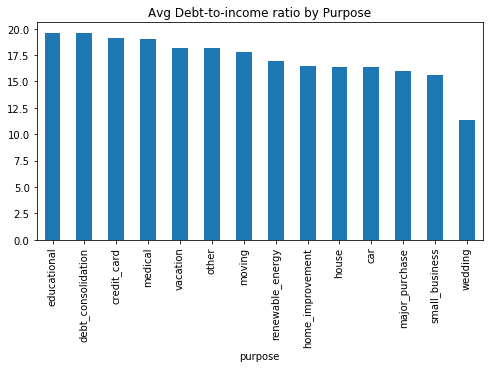

In [219]:
print df.purpose.unique()

df.groupby("purpose")["dti"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Avg Debt-to-income ratio by Purpose")
plt.show();

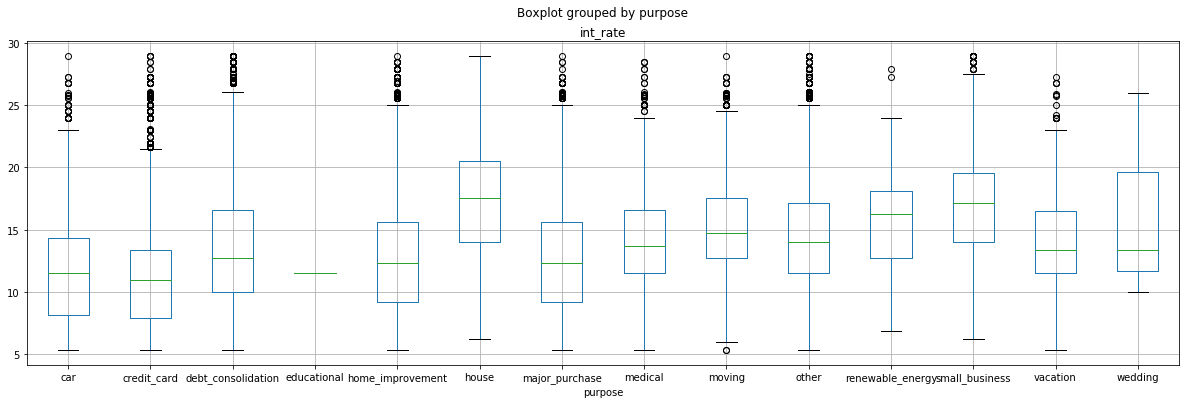

In [220]:
#boxplot
df.boxplot(column="int_rate", by="purpose", figsize=(20, 6))
plt.show();

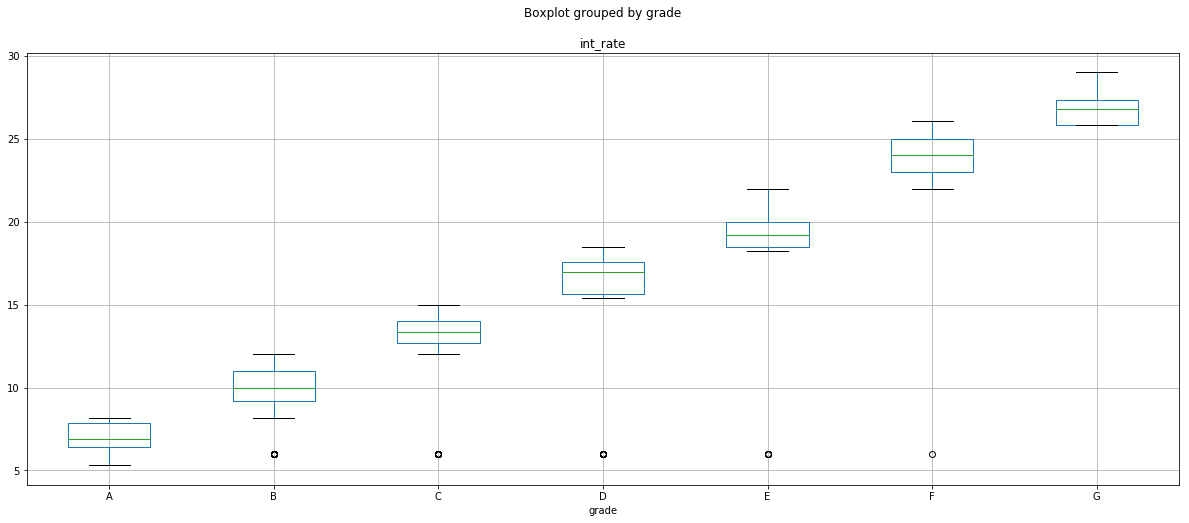

In [221]:
#boxplot
df.boxplot(column="int_rate", by="grade", figsize=(20, 8))
plt.show();

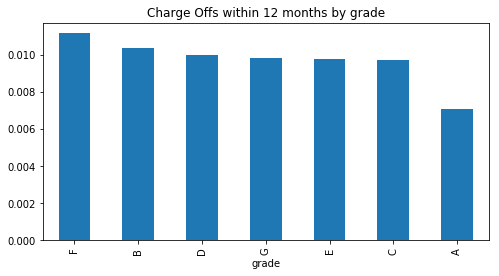

In [123]:
df.groupby("grade")["chargeoff_within_12_mths"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Charge Offs within 12 months by grade");

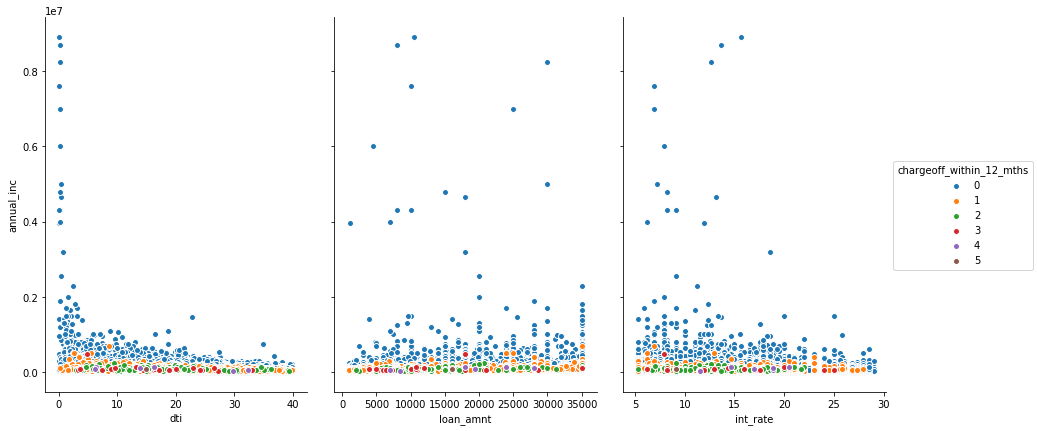

In [223]:
# scatter plot in Seaborn
sns.pairplot(data = df, x_vars=['dti','loan_amnt','int_rate'], 
             y_vars='annual_inc', size=6, hue = 'chargeoff_within_12_mths', aspect=0.7);

In [195]:
lcdf.out_prncp.mean()
#drop!

0.0

In [219]:
df.purpose.value_counts(normalize = True)

debt_consolidation    0.593738
credit_card           0.242285
home_improvement      0.060065
other                 0.045605
major_purchase        0.017690
medical               0.009352
car                   0.008231
small_business        0.007989
moving                0.005747
vacation              0.005341
house                 0.003415
renewable_energy      0.000532
wedding               0.000009
educational           0.000002
Name: purpose, dtype: float64

In [203]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col.head(n = 60)
# remove high null value features.

sec_app_collections_12_mths_ex_med            421095
sec_app_mort_acc                              421095
sec_app_revol_util                            421095
sec_app_open_act_il                           421095
sec_app_num_rev_accts                         421095
sec_app_chargeoff_within_12_mths              421095
sec_app_inq_last_6mths                        421095
sec_app_mths_since_last_major_derog           421095
sec_app_open_acc                              421095
revol_bal_joint                               421095
sec_app_earliest_cr_line                      421095
url                                           421095
desc                                          421050
dti_joint                                     420586
verification_status_joint                     420584
annual_inc_joint                              420584
orig_projected_additional_accrued_interest    419547
hardship_payoff_balance_amount                419305
hardship_reason                               

In [10]:
#created a csv to see full list of features with a lot of null values. 
#Dropped all features with high null values counts

null_col.to_csv('null_col.csv')

In [12]:
non_numerics = [x for x in df.columns \
                if not (df[x].dtype == np.float64 \
                        or df[x].dtype == np.int64)]
numerics = [x for x in df.columns if x not in non_numerics]

In [13]:
non_numerics
# which one of these categorical fields do we need to turn into dummy variables?
# we see that there are some fields where active loans have recorded activity. What if we want 
# our lens to be focused on new loan application data instead? We will drop any categories that
# relate to monthly records or status for active loans.

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

In [226]:
#pass in new subset of features

good_feat = ["num_tl_120dpd_2m",
"mo_sin_old_il_acct",
"percent_bc_gt_75",
"bc_util",
"bc_open_to_buy",
"dti",
"num_rev_accts",
"delinq_2yrs",
"inq_last_6mths",
"revol_bal",
"open_acc",
"pub_rec",
"total_acc",
"num_bc_tl",
"funded_amnt",
"int_rate",
"installment",
"home_ownership",
"annual_inc",
"total_rec_int",
"chargeoff_within_12_mths",
"num_sats",
"num_rev_tl_bal_gt_0",
"total_rev_hi_lim",
"num_op_rev_tl",
"num_il_tl",
"acc_open_past_24mths",
"avg_cur_bal",
"delinq_amnt",
"num_tl_90g_dpd_24m",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_tl_30dpd",
"num_tl_op_past_12m",
"total_il_high_credit_limit",
"num_bc_sats",
"collections_12_mths_ex_med",
"policy_code",
"total_bc_limit",
"pct_tl_nvr_dlq",
"total_bal_ex_mort",
"acc_now_delinq",
"tot_coll_amt",
"tot_cur_bal",
"tot_hi_cred_lim",
"tax_liens",
"pub_rec_bankruptcies",
"loan_amnt",
"revol_util",
"term",
"purpose",
"emp_length",
'loan_status',
'application_type',
'grade']



#manually removed:
#"recoveries", , "hardship_flag", "emp_title", "title", "total_rec_late_fee",
#"funded_amnt_inv", "issue_d", "verification_status", "grade", "sub_grade", "initial_list_status",
#"pymnt_plan", "debt_settlement_flag", "addr_state", "earliest_cr_line",
#"mths_since_recent_bc", "total_rec_prncp", "total_pymnt_inv", "out_prncp_inv",
#'last_pymnt_amnt','collection_recovery_fee','total_pymnt', "out_prncp"

#drop:
#'sub_grade', 'verification_status', 'issue_d', 'pymnt_plan',  'title','zip_code','addr_state',
# 'earliest_cr_line',  'initial_list_status',  'last_pymnt_d', 'next_pymnt_d', 'desc',
#'verification_status_joint', 'hardship_flag','hardship_type','hardship_reason','hardship_status','
#hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_loan_status',
#'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date'

#categorical(included in [good_feat]): will transform to dummies in df_fe function.
#"last_pymnt_d", "last_credit_pull_d"
#'term','emp_length','home_ownership',
#'purpose', 'application_type']


In [227]:
#Create a function that will take unclean data, and apply feature engineering techniques

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
#good_feat eliminates all null columns
df = df[good_feat]
#we only want to focus on "Fully Paid" and "Charged Off" loans as target
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]
df = df[df.application_type != "Joint App"]
#0 for Fully Paid loans, and 1 for Charged Off loans
target_dict = {"Fully Paid":0, "Charged Off":1}
df["loan_status"] = df.loan_status.map(target_dict)


def df_fe(df):
    df.dropna(inplace= True)
    df.drop("application_type", axis=1, inplace =True)
    df["int_rate"] = df.int_rate.str.replace("%", "")  
    df["int_rate"] = df.int_rate.astype(float)
    df["revol_util"] = df.revol_util.str.replace("%", "")  
    df["revol_util"] = df.revol_util.astype(float)
    #create dummy variables for categorical data
    df_purpose_dums = pd.get_dummies(df.purpose, prefix = "purpose", drop_first=True)
    df = pd.concat([df, df_purpose_dums], axis = 1)
    df.drop("purpose", axis = 1, inplace=True)
    df_term_dums = pd.get_dummies(df.term, prefix = "term", drop_first = True)
    df = pd.concat([df, df_term_dums], axis = 1)
    df.drop("term", axis = 1, inplace=True)
    df_emp_length_dums = pd.get_dummies(df.emp_length, prefix = "emp_length", drop_first = True)
    df = pd.concat([df, df_emp_length_dums], axis = 1)
    df.drop("emp_length", axis = 1, inplace=True)
    df_ownership_dums = pd.get_dummies(df.home_ownership, prefix = "ownership", drop_first = True)
    df = pd.concat([df, df_ownership_dums], axis = 1)
    df.drop("home_ownership", axis = 1, inplace=True)
    df.columns = df.columns.str.lower()
    #df.columns = df.columns.str.replace(" ", "_")
    #df.columns = df.columns.str.replace("-", "_")
    #df.columns = df.columns.str.replace("__", "_")
    #fico has high and low range columns, take average!
    #df["fico_average"] = df[["fico_high_range", "fico_low_range"]].mean(axis=1)
    return df

In [228]:
lcdf = df_fe(df)

In [229]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193448 entries, 1 to 421094
Data columns (total 82 columns):
num_tl_120dpd_2m              193448 non-null float64
mo_sin_old_il_acct            193448 non-null float64
percent_bc_gt_75              193448 non-null float64
bc_util                       193448 non-null float64
bc_open_to_buy                193448 non-null float64
dti                           193448 non-null float64
num_rev_accts                 193448 non-null float64
delinq_2yrs                   193448 non-null int64
inq_last_6mths                193448 non-null int64
revol_bal                     193448 non-null int64
open_acc                      193448 non-null int64
pub_rec                       193448 non-null int64
total_acc                     193448 non-null int64
num_bc_tl                     193448 non-null int64
funded_amnt                   193448 non-null int64
int_rate                      193448 non-null float64
installment                   193448 non-

In [233]:
lcdf.corr()["loan_status"].sort_values(ascending = False)
# which columns are higly correlated to our new binary loan_status?

loan_status                   1.000000
int_rate                      0.299124
term_ 60 months               0.172835
dti                           0.155343
percent_bc_gt_75              0.103048
acc_open_past_24mths          0.102208
bc_util                       0.098974
num_actv_rev_tl               0.094012
num_rev_tl_bal_gt_0           0.094004
ownership_rent                0.093433
revol_util                    0.090039
num_tl_op_past_12m            0.087001
inq_last_6mths                0.083214
total_rec_int                 0.082592
num_actv_bc_tl                0.057721
emp_length_n/a                0.047223
loan_amnt                     0.044909
funded_amnt                   0.044909
num_op_rev_tl                 0.039099
num_sats                      0.034712
open_acc                      0.034492
installment                   0.030790
purpose_debt_consolidation    0.028949
purpose_small_business        0.026833
delinq_2yrs                   0.023774
pub_rec                  

In [25]:
# try in h2o.ai 
# lcdf.to_csv("LC_FE.csv")

In [100]:
grade_classes = lcdf.grade
lcdf.drop("grade", axis = 1, inplace= True)

# Now our dataset is ready for Machine Learning!

lcdf is the master DataFrame we will work with

In [101]:
lcdf.shape

(193448, 82)

In [102]:
lcdf.columns

Index([u'num_tl_120dpd_2m', u'mo_sin_old_il_acct', u'percent_bc_gt_75',
       u'bc_util', u'bc_open_to_buy', u'dti', u'num_rev_accts', u'delinq_2yrs',
       u'inq_last_6mths', u'revol_bal', u'open_acc', u'pub_rec', u'out_prncp',
       u'total_acc', u'num_bc_tl', u'funded_amnt', u'int_rate', u'installment',
       u'annual_inc', u'total_rec_int', u'chargeoff_within_12_mths',
       u'num_sats', u'num_rev_tl_bal_gt_0', u'total_rev_hi_lim',
       u'num_op_rev_tl', u'num_il_tl', u'acc_open_past_24mths', u'avg_cur_bal',
       u'delinq_amnt', u'num_tl_90g_dpd_24m', u'mo_sin_old_rev_tl_op',
       u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl', u'mort_acc',
       u'num_accts_ever_120_pd', u'num_actv_bc_tl', u'num_actv_rev_tl',
       u'num_tl_30dpd', u'num_tl_op_past_12m', u'total_il_high_credit_limit',
       u'num_bc_sats', u'collections_12_mths_ex_med', u'policy_code',
       u'total_bc_limit', u'pct_tl_nvr_dlq', u'total_bal_ex_mort',
       u'acc_now_delinq', u'tot_coll_amt', u'tot_cur

In [28]:
lcdf.chargeoff_within_12_mths.value_counts()

0    191763
1      1560
2        98
3        20
4         6
5         1
Name: chargeoff_within_12_mths, dtype: int64

In [29]:
#Null Accuracy. If we predicted that all loans will default, then we would be correct ~26% of the time.
lcdf.loan_status.value_counts(normalize=True)

0    0.739155
1    0.260845
Name: loan_status, dtype: float64

In [30]:
lcdf.groupby("loan_status").mean()

,num_tl_120dpd_2m,mo_sin_old_il_acct,percent_bc_gt_75,bc_util,bc_open_to_buy,dti,num_rev_accts,delinq_2yrs,inq_last_6mths,revol_bal,...,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a,ownership_own,ownership_rent
loan_status,,,,,,,,,,,,,,,,,,,,,
0,0.00079,126.099022,42.999822,58.290237,11023.741587,18.261456,15.228089,0.313432,0.554739,16850.187128,...,0.058991,0.060774,0.040591,0.044486,0.052410,0.040514,0.083301,0.044444,0.104995,0.367954
1,0.00111,122.516310,51.457388,64.684390,7264.223940,21.293329,15.045244,0.361732,0.719976,15702.554082,...,0.059572,0.060028,0.039655,0.044590,0.052596,0.040904,0.086247,0.068014,0.111336,0.471978


In [31]:
lcdf.groupby("loan_status")["int_rate"].median().sort_values(ascending = False)
#not a huge meaningful difference here
#loan_status_mean = df.groupby("loan_status").mean()
#loan_status_mean.to_csv('loan_status_mean.csv')

loan_status
1    14.65
0    11.99
Name: int_rate, dtype: float64

In [32]:
#new subset. Hand picked for first Decision Tree model only.

subset = [
 'dti',
 'num_rev_accts',
 'delinq_2yrs',
 'revol_bal',
 'open_acc',
 'pub_rec',
 'int_rate',
 'annual_inc',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'collections_12_mths_ex_med',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'revol_util',
 'mort_acc',
 'loan_status',
u'purpose_credit_card', u'purpose_debt_consolidation',
u'purpose_educational', u'purpose_home_improvement', u'purpose_house',
u'purpose_major_purchase', u'purpose_medical', u'purpose_moving',
u'purpose_other', u'purpose_renewable_energy',
u'purpose_small_business', u'purpose_vacation', u'purpose_wedding',
u'term_ 60 months', u'emp_length_10+ years', u'emp_length_2 years',
u'emp_length_3 years', u'emp_length_4 years', u'emp_length_5 years',
u'emp_length_6 years', u'emp_length_7 years', u'emp_length_8 years',
u'emp_length_9 years', u'emp_length_< 1 year', u'emp_length_n/a',
u'ownership_own', u'ownership_rent']

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from time import time
import pandas as pd;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [34]:
lcdf1 = lcdf[subset]

In [35]:
lcdf1.shape

(193448, 43)

# Decision Tree model selection w/ random subset of features

In [279]:
X = lcdf1.drop("loan_status", axis =1)
y = lcdf1.loan_status

In [284]:
y.value_counts(normalize= True)

0    0.739155
1    0.260845
Name: loan_status, dtype: float64

In [280]:
dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 123)

In [286]:
dt.fit(X_train, y_train)

print (dt.score(X_train, y_train), dt.score(X_test, y_test))

(0.73913278296427742, 0.7391992230333031)


In [288]:
#Range of neighbors to test
depths_range = range(2, 15)

#Dictionary of parameter values 
param_grid_dt = {}

#Param grid with test different split criteria as well. entropy takes the log. gini takes the squared...
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}
param_grid_dt["min_samples_split"] = [2, 10]
param_grid_dt["max_features"] = [1, 2, 5, 10, 15, 20, 40]

param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'max_features': [1, 2, 5, 10, 15, 20, 40],
 'min_samples_split': [2, 10]}

In [303]:
#Intialize RandomizedSearchCV grid with n_iter = 10
grid_dt = RandomizedSearchCV(DecisionTreeClassifier(), n_iter = 10,
                            param_distributions = param_grid_dt, cv = 10, scoring = "accuracy")

#Fit grid on data
grid_dt.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'min_samples_split': [2, 10], 'max_features': [1, 2, 5, 10, 15, 20, 40], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [304]:
grid_dt.best_score_

0.7462212067325587

In [305]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 15,
 'min_samples_split': 2}

In [301]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=40, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [293]:
#now let's run the Decision Tree Classifier model with the best parameters.

In [30]:
dt = DecisionTreeClassifier(max_depth= 7, criterion= "entropy", max_features= 15, min_samples_split= 2)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [307]:
dt.score(X, y)

0.74863529217153968

In [308]:
print (dt.score(X_train, y_train), dt.score(X_test, y_test))

(0.74855335236478671, 0.74880165418716127)


In [309]:
sorted(zip(dt.feature_importances_, X.columns), reverse= True)

[(0.77471664831318365, 'int_rate'),
 (0.062727685607410433, 'dti'),
 (0.048314002972043954, 'avg_cur_bal'),
 (0.033139921886334044, 'mort_acc'),
 (0.015102264938484976, 'term_ 60 months'),
 (0.01230084135798787, 'loan_amnt'),
 (0.01205980713003506, 'revol_util'),
 (0.011188872320042679, 'ownership_rent'),
 (0.0081208533560070267, 'revol_bal'),
 (0.0066048325353841785, 'emp_length_n/a'),
 (0.0057367169159591863, 'delinq_2yrs'),
 (0.0049935573571361826, 'acc_open_past_24mths'),
 (0.0027345036700859686, 'annual_inc'),
 (0.0013289436494099301, 'num_rev_accts'),
 (0.00036173369200318174, 'ownership_own'),
 (0.00029441614881978482, 'open_acc'),
 (0.00027439814967214433, 'emp_length_4 years'),
 (0.0, 'purpose_wedding'),
 (0.0, 'purpose_vacation'),
 (0.0, 'purpose_small_business'),
 (0.0, 'purpose_renewable_energy'),
 (0.0, 'purpose_other'),
 (0.0, 'purpose_moving'),
 (0.0, 'purpose_medical'),
 (0.0, 'purpose_major_purchase'),
 (0.0, 'purpose_house'),
 (0.0, 'purpose_home_improvement'),
 (0.0,

In [ ]:
preds = dt.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, preds)
cm

array([[45866,  1323],
       [14888,  1761]])

In [34]:
recall_score(y_test, preds)

0.10577211844555229

In [35]:
precision_score(y_test, preds)

0.57101167315175094

In [36]:
accuracy_score(y_test, preds)

0.74606034023622292

In [ ]:
# We are able to slightly beat the null w/ a random subset of features.
#Let's use Random Forest to find Feature Importance of lcdf (the entire list of features we prepapred)

# Random Forest Model with GridSearch

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
X = lcdf.drop('loan_status', axis= 1)
y = lcdf.loan_status

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33,
                                                   random_state = 123)

In [105]:
rf = RandomForestClassifier(n_estimators= 43, criterion= 'entropy', max_depth= 11, max_features= 20, 
                            n_jobs = -1, min_samples_split = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
rf.score(X_test, y_test)

0.7553964723205614

In [107]:
preds = rf.predict(X_test)

In [108]:
confusion_matrix(y_test, preds)

array([[45482,  1707],
       [13908,  2741]])

In [109]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.27664991448352422, 'int_rate'),
 (0.065408300264403765, 'dti'),
 (0.064831875305320461, 'term_ 60 months'),
 (0.049493530824485196, 'total_rec_int'),
 (0.039286116958130071, 'avg_cur_bal'),
 (0.032416972608514262, 'tot_hi_cred_lim'),
 (0.027127044668684968, 'bc_open_to_buy'),
 (0.025269683379029254, 'tot_cur_bal'),
 (0.0195660724965472, 'installment'),
 (0.018900163697088235, 'revol_util'),
 (0.018458353751652164, 'mo_sin_old_rev_tl_op'),
 (0.018111822675546917, 'total_bc_limit'),
 (0.017951219170562121, 'annual_inc'),
 (0.01718332279969096, 'total_rev_hi_lim'),
 (0.016724750586918209, 'bc_util'),
 (0.014970847310420777, 'mo_sin_old_il_acct'),
 (0.014370839669340872, 'revol_bal'),
 (0.01367977827741336, 'total_il_high_credit_limit'),
 (0.01341701542248437, 'total_bal_ex_mort'),
 (0.013362977378222313, 'num_rev_tl_bal_gt_0'),
 (0.012643164790549019, 'loan_amnt'),
 (0.012390320681607888, 'acc_open_past_24mths'),
 (0.012250280530750463, 'funded_amnt'),
 (0.01181076429516607, 'mort_acc

In [ ]:
# grid search for best parameters in Random Forest model:

In [66]:
#Intialize parameter grid

#Range of estimators to test
est_range = range(1, 50, 2)
depths_range = range(2, 15)

#Dictionary of parameter values 
param_grid_rf = {}

param_grid_rf = {"criterion": ["gini", "entropy"], "max_depth": depths_range, "n_estimators": est_range}
param_grid_rf["min_samples_split"] = [2, 10]
param_grid_rf["max_features"] = [1, 2, 5, 10, 15, 20, 30, 40, 80]

In [71]:
from time import time 

In [72]:
#Intialize RandomizedSearchCV grid with n_iter = 10
grid_rf = RandomizedSearchCV(RandomForestClassifier(), n_iter = 10,
                            param_distributions = param_grid_rf, cv = 5, scoring = "accuracy")

t = time()

#Fit grid on data
grid_rf.fit(X, y)

print time() - t

679.130218029


In [73]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 20,
 'min_samples_split': 10,
 'n_estimators': 43}

In [74]:
grid_rf.best_score_

0.7664436954633803

In [67]:
y.value_counts(normalize= True)

0    0.739155
1    0.260845
Name: loan_status, dtype: float64

In [ ]:
# Random Forest via gridsearch beats the null accuracy, but I think we can do better!

# AdaBoost Model Selection

In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [173]:
#Intialize time variable
t = time()

#Create list of estimator values
estimators = range(200, 401, 20)

#Intialize cross validation scores list
cv_scores = []

#Iterate over estimators values, fit models, and then append scores to cv_scores
for est in estimators:
    model = AdaBoostClas5sifier(n_estimators= est, learning_rate= 1)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)
    
#Print difference in time
print (time() - t)


3461.63787198


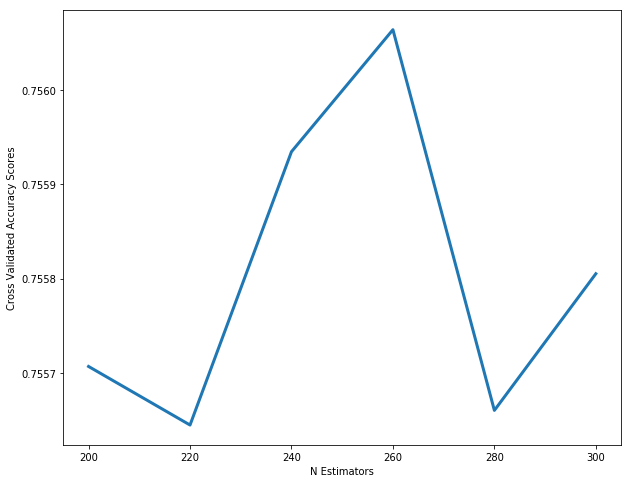

In [174]:
#Plot estimators versus scores
plt.figure(figsize = (10, 8))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

In [175]:
sorted(zip(cv_scores, estimators), reverse = True)[0]

(0.75606361124789778, 260)

In [178]:
best_scores = []
for _ in range(100, 150, ):
    rand = RandomizedSearchCV(ada, param_dist, cv = 5, scoring = "accuracy", n_iter =10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

SyntaxError: invalid syntax (<ipython-input-178-24bb7a52598a>, line 2)

In [ ]:
ada = AdaBoostClassifer()

In [205]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [206]:
#Create new param_grid
neighbors_range = range(3, 13, 2)
param_grid_knn = {}
param_grid_knn["kneighborsclassifier__n_neighbors"] = neighbors_range
param_grid_knn

{'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11]}

In [ ]:
#Pass in pipe into GridSearchCV function, 
grid_knn_pipe = GridSearchCV(pipe, param_grid= param_grid_knn, cv = 5, scoring = "accuracy")

#Fit on original versions of data
grid_knn_pipe.fit(X, y)

#Best scores and params
grid_knn_pipe.best_score_

In [ ]:
grid_knn_pipe.best_estimator_

# Logistic Regression Model Selection | Scaled Data

In [37]:
from sklearn.preprocessing import StandardScaler

# https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_on_very_large_data/

In [38]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [41]:
# Create logistic regression object using sag solver
clf = LogisticRegression(random_state=0, solver='sag')

# Train model
model = clf.fit(X_std, y)

In [42]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
clf.score(X_std, y)

0.75074438608825111

In [50]:
#Assign X and y

X = lcdf1.drop("loan_status", axis =1)
y = lcdf1.loan_status

In [25]:
y.value_counts(normalize=True)

0    0.739155
1    0.260845
Name: loan_status, dtype: float64

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=123)

In [51]:
#Pass the predictions and y_test into a confusion matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

In [71]:
cm2 = confusion_matrix(y_test, preds)
cm2

array([[47189,     0],
       [16647,     2]])

In [21]:
ps = precision_score(y_test, preds)
rs = recall_score(y_test, preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 100.00 and the recall score is 0.01


In [70]:
score = lr.score(X, y)
print score*100

73.9165046938


In [52]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs

cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="accuracy").mean()


0.73866879212239567

In [53]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

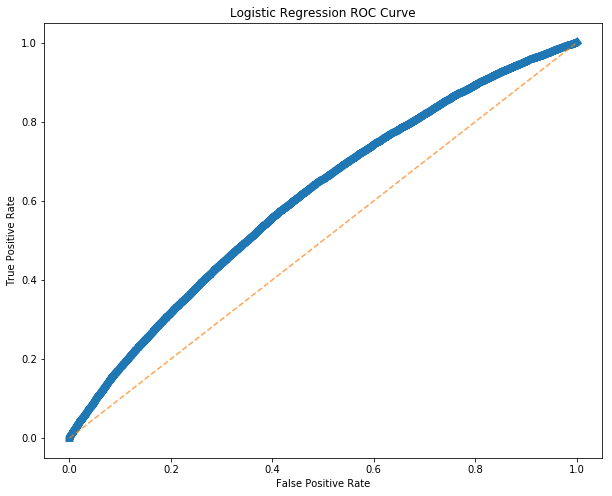

In [69]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth= 8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [56]:
#Table of coefficients and their values
coef = pd.DataFrame(zip(X.columns, np.transpose(lr.coef_[0])), columns=["coef", "value"])
#coef.to_csv('coef.csv')

In [57]:
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef.sort_values(by = "value", ascending = False)

,coef,value,odds_ratio
6,int_rate,5.806476e-03,1.005823
28,term_ 60 months,8.910943e-04,1.000891
13,revol_util,7.309232e-04,1.000731
8,acc_open_past_24mths,6.166388e-04,1.000617
2,delinq_2yrs,2.291914e-04,1.000229
25,purpose_small_business,3.626969e-05,1.000036
39,emp_length_n/a,3.396073e-05,1.000034
10,collections_12_mths_ex_med,1.708668e-05,1.000017
12,loan_amnt,1.364892e-05,1.000014
22,purpose_moving,7.106116e-06,1.000007


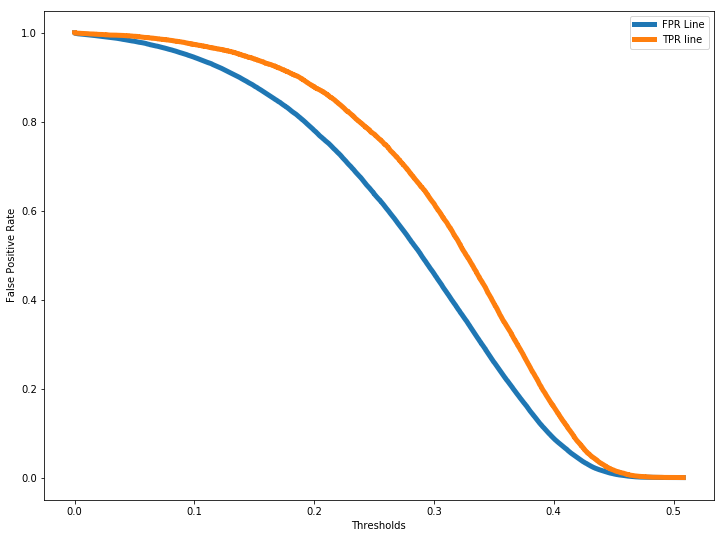

In [58]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

In [59]:
labels_70 = np.where(test_probs >= 0.7, 1, 0)
labels_70[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
accuracy_score(y_test, labels_70)


0.7391992230333031

In [61]:
#it does not get better.
def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)

In [67]:
#Generate thresholds and pass them into function
thresholds = np.linspace(0, 1, 50)
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]

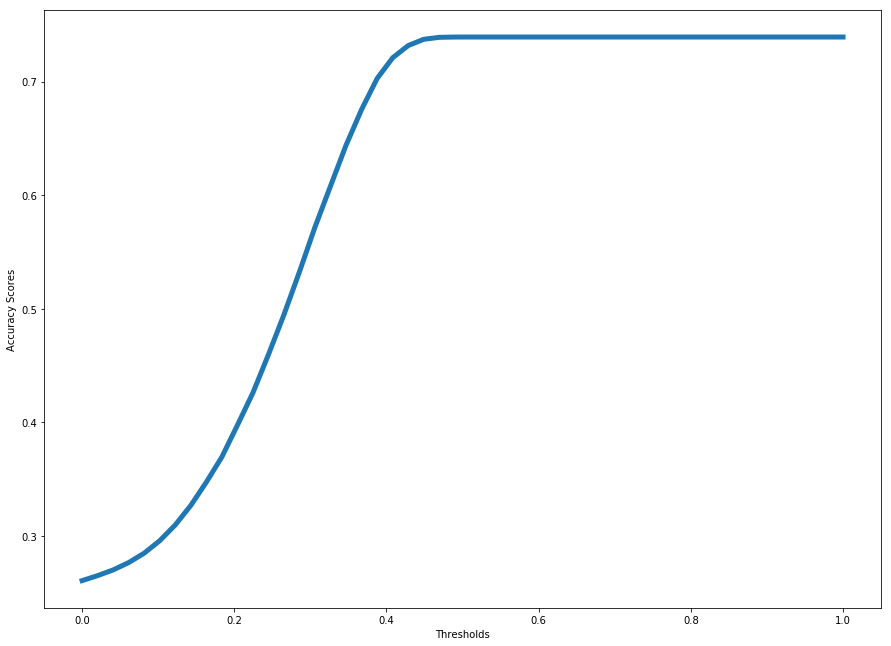

In [68]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(15,11))
plt.plot(thresholds, acc_scores, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

In [64]:
thres_score_dict = dict(zip(thresholds, acc_scores))
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0][0]

1.0

In [146]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/darrenklee/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [151]:
# create feature union
features = []
features.append(('pca', PCA(n_components=40)))
features.append(('select_best', SelectKBest(k=40)))
feature_union = FeatureUnion(features) 

In [152]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

In [153]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.74888865248
